In [8]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import src.data_import as di
from src.poly_reg import model_county
from src.poly_reg import model_state

plt.style.use('ggplot')
font = {'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)


#df = extract_nyt()
print('done')

done


In [5]:
nyt_df = di.extract_nyt()

In [9]:
per100k = di.build_per_100k(counties, nyt_df)

In [10]:
ten = per100k[per100k['cases_per'] > 10].groupby('fips').min()
ten = ten[['date']]
ten.columns = ['date_10']

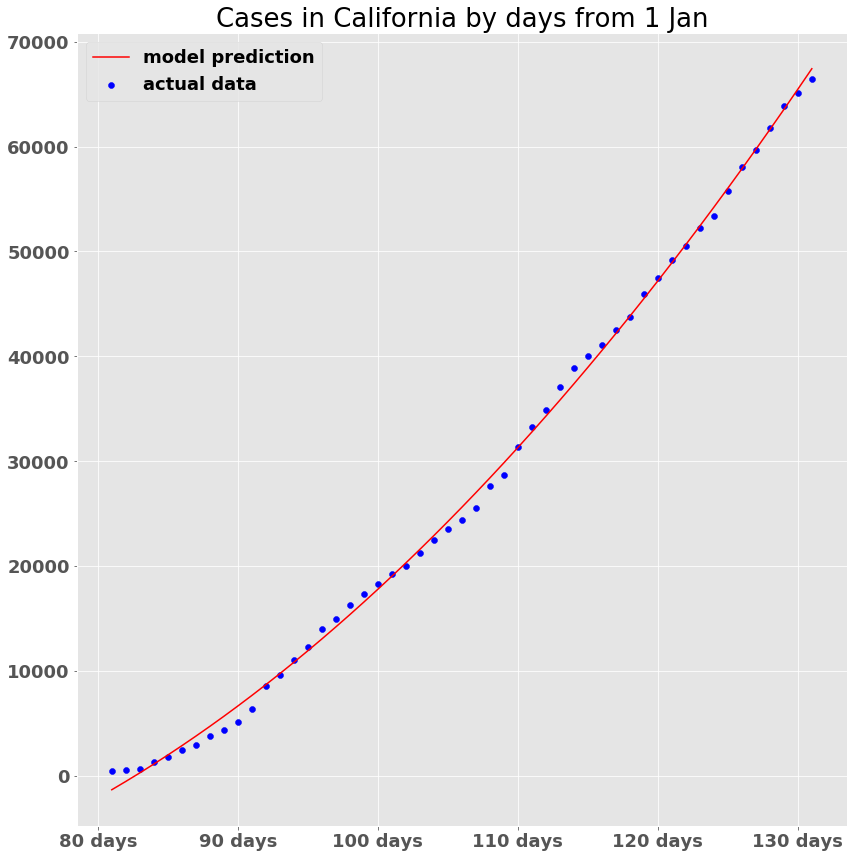

In [59]:
state = "California"
#df2 = df[df['cases'] > 100]
df2 = nyt_df[nyt_df['cases'] > 400]
X, X_poly, y, lin = model_state(df2, state, degree=2)

#y = pd.DataFrame(y).diff()
fig, ax = plt.subplots(figsize=(12,12))
fig.tight_layout()

plt.scatter(X, y, color = 'blue', label="actual data") 
#print(X)
y1 = lin.predict(X_poly)
#print(y1)
plt.plot(X, y1, color = 'red', label="model prediction") 
plt.title('Cases in {} by days from 1 Jan'.format(state)) 
ax.legend()
xlabels = ['{:,.0f}'.format(x) + ' days' for x in ax.get_xticks()]
ax.set_xticklabels(xlabels)

  
plt.show() 

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


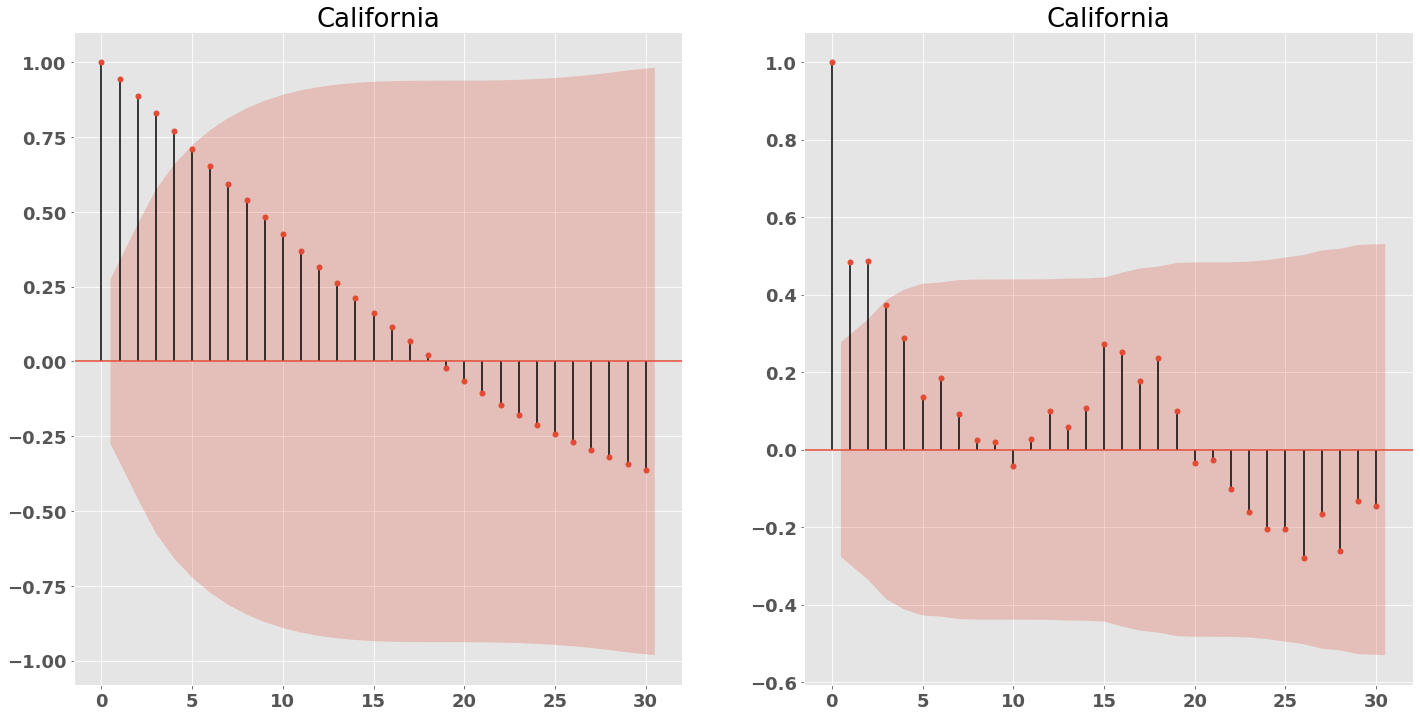

array([[    0.        , -1150.90411303,    11.91821158]])

In [60]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

fig, axs = plt.subplots(1,2, figsize=(24,12))
acf_array = acf(y)
#print(acf_array)
diffed = pd.DataFrame(y).diff().values[1:]

plot_acf(y, alpha=0.05, lags=30, ax=axs[0], title="California")
plot_acf(diffed, alpha=0.05, lags=30, ax=axs[1], title="California")
plt.show()
lin.coef_

In [61]:
params = []
for state in nyt_df.state.unique():
    X, X_poly, y, lin = model_state(nyt_df, state)
    if not X is None:
        params.append([state, lin.intercept_[0], lin.coef_[0][1], lin.coef_[0][2]])
    #print(lin.coef_[0])
params

[['Washington', -7680.8522389737855, 17.49314990895642, 1.420953742943905],
 ['Illinois', 134758.03264356873, -3660.2992972082498, 24.802601296553444],
 ['California', 67554.0465849687, -2123.008524732766, 16.45997928103188],
 ['Arizona', 9035.558468785539, -313.2687249140622, 2.5237496972849347],
 ['Massachusetts', 94495.74069257203, -2894.062988825735, 21.606896128066065],
 ['Wisconsin', 11199.787281982888, -336.99713540865486, 2.5139922790612235],
 ['Texas', 46030.858256205334, -1394.931026033297, 10.418788850133604],
 ['Nebraska', 14175.852548404979, -391.18162701133673, 2.5889349111506124],
 ['Utah', 1872.3584098021943, -108.37215071337017, 1.0912430807307318],
 ['Oregon', -2916.2270392711803, 25.013813576967237, 0.16791970344658783],
 ['Florida', -43342.33802399995, 414.3555794427699, 1.8896704537745652],
 ['Georgia', 1067.768568503563, -412.9186167361633, 5.053522631059584],
 ['New Hampshire', 2305.801286458014, -82.93934581752302, 0.6832182991439029],
 ['North Carolina',
  1827